# Brute Force Method

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.Dark2.colors)
import bruteCharges

### Program CsCl lattice

In [29]:
#Defining the atomic system for CsCl

alattice = 4.119 # Defines the lattice spacing of the cell
a = np.array ([1,0,0])
b = np.array ([0,1,0])
c = np.array ([0,0,1])

nq = 2
q = np.zeros([nq], dtype = 'float')
q[0] =  1. # Tells to tag a positive charge to the first q (Cs)
q[1] = -1. # Tells to tag a negative charge to the second q (Cl)
tau = np.zeros([3,nq], dtype = 'float')
tau[:,0] = [0,0,0] # Indicates the coordinates of the (Cs) in the cell/lattice
tau[:,1] = [1./2.,1./2.,1./2.] # Indicates the coordinates of the (Cl) in the cell/lattice

In [30]:
#Defining the atomic system for NaCl

alatticeNaCl = 2.814 # Defines the lattice spacing of the cell in Angstroms
aNaCl = np.array ([1,0,0])
bNaCl = np.array ([0,1,0])
cNaCl = np.array ([0,0,1])

nqNaCl = 8
qNaCl = np.zeros([nqNaCl], dtype = 'float')
qNaCl[0] =  1. 
qNaCl[1] = -1. 
qNaCl[2] = 1.
qNaCl[3] = -1.
qNaCl[4] =  1. 
qNaCl[5] = -1. 
qNaCl[6] =  1. 
qNaCl[7] = -1. 
tauNaCl = np.zeros([3,nqNaCl], dtype = 'float')
tauNaCl[:,0] = [1./2.,1./2.,1./2.]
tauNaCl[:,1] = [0,0,0]
tauNaCl[:,2] = [0,0,1./2.]
tauNaCl[:,3] = [1./2.,1./2.,0]
tauNaCl[:,4] = [0,1./2.,0]
tauNaCl[:,5] = [1./2.,0,1./2.]
tauNaCl[:,6] = [1./2.,0,0]
tauNaCl[:,7] = [0,1./2.,1./2.]

In [31]:
#Summation
bruteCharges.sumCharges(aNaCl, bNaCl, cNaCl, qNaCl, tauNaCl, 20, parallel=True)

-3.495129160889318

In [32]:
#Energy per cell in NaCl
14.3996*bruteCharges.sumCharges(aNaCl, bNaCl, cNaCl, qNaCl, tauNaCl, 10)/alatticeNaCl

-17.885023573775296

In [33]:
#Produce plot of real sum vs hmaxT
maxT = np.linspace(1, 20, 10, dtype=int)
madelungBruteCsCl = []
for i in range(len(maxT)):
    madelungBruteCsCl.append(bruteCharges.sumCharges(a, b, c, q, tau, maxT[i]))

In [34]:
#Produce plot of real sum vs hmaxT
maxT = np.linspace(1, 20, 10, dtype=int)
madelungBruteNaCl = []
for i in range(len(maxT)):
    madelungBruteNaCl.append(bruteCharges.sumCharges(aNaCl, bNaCl, cNaCl, qNaCl, tauNaCl, maxT[i]))

In [35]:
thValueCsCl = -2.035362 #reference value for comparison
thValueNaCl = -3.495130 #reference value for comparison

errorBruteNaCl = np.abs(100*(np.array(madelungBruteNaCl) - thValueNaCl) / thValueNaCl)
errorBruteCsCl = np.abs(100*(np.array(madelungBruteCsCl) - thValueCsCl) / thValueCsCl)

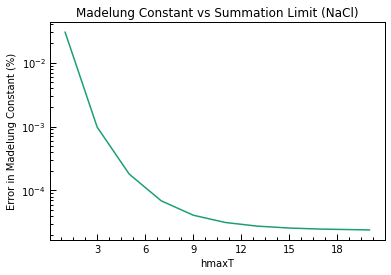

In [36]:
fig = plt.figure()
ax = fig.gca()
ax.set_title('Madelung Constant vs Summation Limit (NaCl)')
ax.set_xlabel('hmaxT')
ax.set_ylabel('Error in Madelung Constant (%)')
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.set_yscale('log')
ax.plot(maxT, errorBruteNaCl, label='NaCl')
fig.savefig('Plots/bruteMadelungNaCl.png')

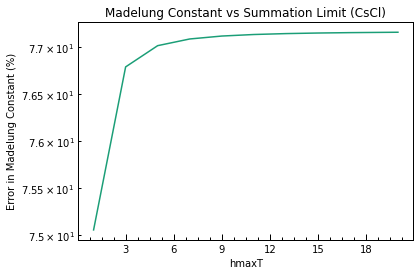

In [37]:
fig = plt.figure()
ax = fig.gca()
ax.set_title('Madelung Constant vs Summation Limit (CsCl)')
ax.set_xlabel('hmaxT')
ax.set_ylabel('Error in Madelung Constant (%)')
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.set_yscale('log')
ax.plot(maxT, errorBruteCsCl, label='CsCl')
fig.savefig('Plots/bruteMadelungCsCl.png')

# Ewald Method

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from ewaldCharges import ewald

In [39]:
#Correct convergence for the case of CsCl
np.sum(ewald(a, b, c, q, tau, 4, 10, 10))

-2.035361509452596

In [40]:
#Produce plot of reciprocal sum vs hmaxg
maxG = np.linspace(1, 20, 10, dtype=int)
madelungEwaldGCsCl = []
for i in range(len(maxG)):
    ewaldVals = ewald(a, b, c, q, tau, 4, maxG[i], 10)
    madelungEwaldGCsCl.append(np.sum(ewaldVals))

In [41]:
#Produce plot of real sum vs hmaxT
maxT = np.linspace(1, 20, 10, dtype=int)
madelungEwaldTCsCl = []
for i in range(len(maxT)):
    ewaldVals = ewald(a, b, c, q, tau, 4, 10, maxT[i])
    madelungEwaldTCsCl.append(np.sum(ewaldVals))

In [42]:
errorEwaldGCsCl = np.abs(100*(np.array(madelungEwaldGCsCl) - thValueCsCl) / thValueCsCl)
errorEwaldTCsCl = np.abs(100*(np.array(madelungEwaldTCsCl) - thValueCsCl) / thValueCsCl)

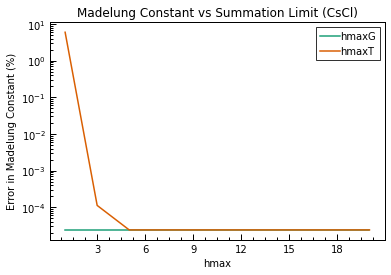

In [43]:
fig = plt.figure()
ax = fig.gca()
ax.set_title('Madelung Constant vs Summation Limit (CsCl)')
ax.set_xlabel('hmax')
ax.set_ylabel('Error in Madelung Constant (%)')
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.set_yscale('log')
ax.plot(maxG, errorEwaldGCsCl, label='hmaxG')
ax.plot(maxT, errorEwaldTCsCl, label='hmaxT')
ax.legend()
fig.savefig('Plots/ewaldMadelungCsCl.png')

In [44]:
#Produce plot of madelung constant vs eta
etas = np.linspace(0.1, 2.0, 8)
madelungEwaldEtaCsCl = []
for i in range(len(etas)):
    ewaldVals = ewald(a, b, c, q, tau, etas[i], 10, 10)
    madelungEwaldEtaCsCl.append(np.sum(ewaldVals))

In [45]:
errorEwaldEtaCsCl = np.abs(100*(np.array(madelungEwaldEtaCsCl) - thValueCsCl) / thValueCsCl)

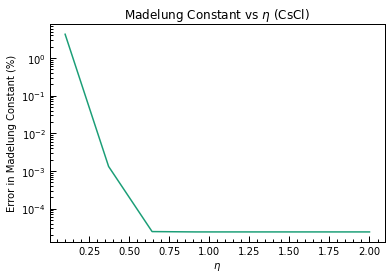

In [46]:
fig = plt.figure()
ax = fig.gca()
ax.set_title('Madelung Constant vs $\eta$ (CsCl)')
ax.set_xlabel('$\eta$')
ax.set_ylabel('Error in Madelung Constant (%)')
#ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.set_yscale('log')
ax.plot(etas, errorEwaldEtaCsCl)
fig.savefig('Plots/ewaldMadelungEtaCsCl.png')

### Convergence for different $\eta$

In [47]:
etasPlotsNaCl = []
for s in range(len(etas)):
    madelungEwaldEtasNaCl = []
    for i in range(len(maxG)):
        ewaldVals = ewald(aNaCl, bNaCl, cNaCl, qNaCl, tauNaCl, etas[s], maxG[i], 10)
        madelungEwaldEtasNaCl.append(np.sum(ewaldVals))
    etasPlotsNaCl.append(madelungEwaldEtasNaCl)

In [48]:
errMadEtasGNaCl = []
for i in range(len(etas)):
    errMadEtasGNaCl.append(np.abs(100*(np.array(etasPlotsNaCl[i]) - thValueNaCl) / thValueNaCl))

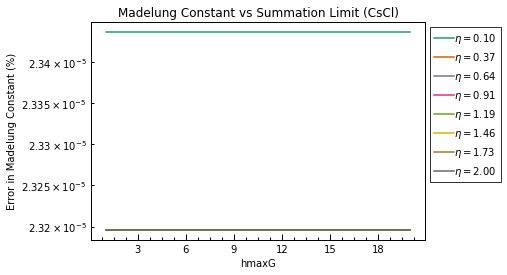

In [49]:
fig = plt.figure()
ax = fig.gca()
ax.set_title('Madelung Constant vs Summation Limit (CsCl)')
ax.set_xlabel('hmaxG')
ax.set_ylabel('Error in Madelung Constant (%)')
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.set_yscale('log')
for i in range(len(etas)):
    ax.plot(maxG, errMadEtasGNaCl[i], label='$\eta = $'+"{:.2f}".format(etas[i]))
ax.legend(bbox_to_anchor=(1, 1))
fig.savefig('Plots/ewaldMadelungGNaCl.png')

In [50]:
etasPlotsTNaCl = []
for s in range(len(etas)):
    madelungEwaldEtasTNaCl = []
    for i in range(len(maxT)):
        ewaldVals = ewald(aNaCl, bNaCl, cNaCl, qNaCl, tauNaCl, etas[s], 10, maxT[i])
        madelungEwaldEtasTNaCl.append(np.sum(ewaldVals))
    etasPlotsTNaCl.append(madelungEwaldEtasTNaCl)

In [51]:
errMadEtasTNaCl = []
for i in range(len(etas)):
    errMadEtasTNaCl.append(np.abs(100*(np.array(etasPlotsTNaCl[i]) - thValueNaCl) / thValueNaCl))

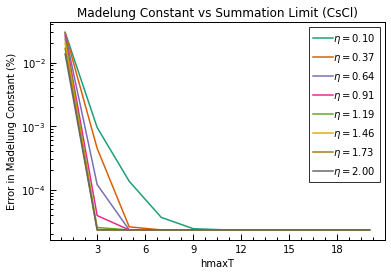

In [52]:
fig = plt.figure()
ax = fig.gca()
ax.set_title('Madelung Constant vs Summation Limit (CsCl)')
ax.set_xlabel('hmaxT')
ax.set_ylabel('Error in Madelung Constant (%)')
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.set_yscale('log')
for i in range(len(etas)):
    ax.plot(maxG, errMadEtasTNaCl[i], label='$\eta = $'+"{:.2f}".format(etas[i]))
ax.legend(bbox_to_anchor=(1, 1))
fig.savefig('Plots/ewaldMadelungTNaCl.png')